In [1]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

C:\Users\USER\anaconda3\envs\jcopml\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\anaconda3\envs\jcopml\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
cv2.__version__

'4.8.0'

In [4]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
ig = Image.open(r"C:\Users\USER\Documents\2023\AI\2. Person Tracking\jokowi.jpg")

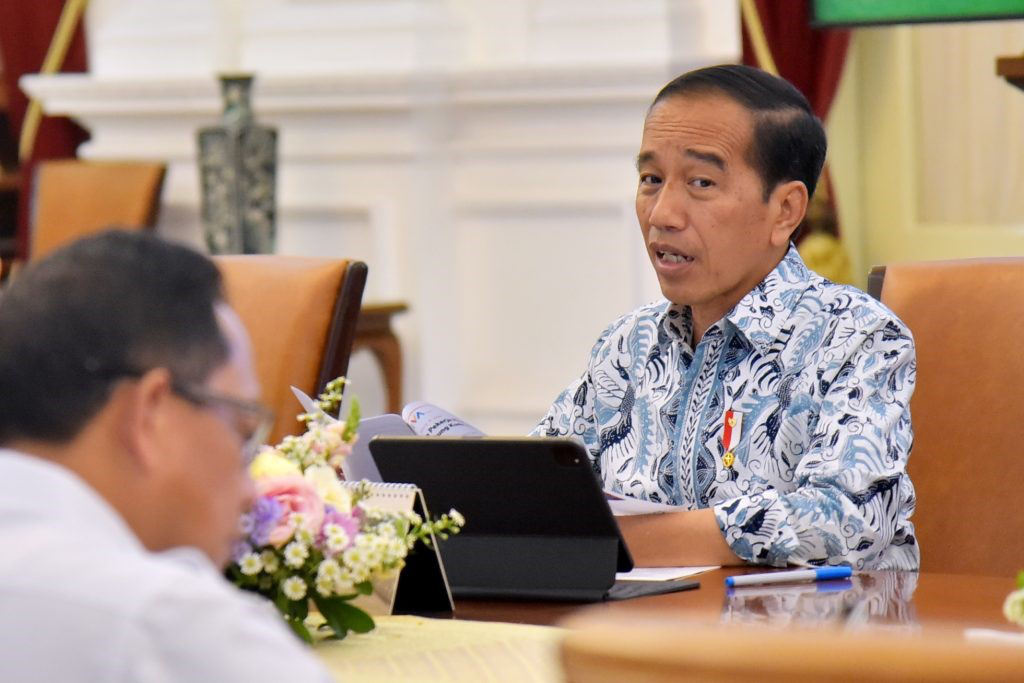

In [6]:
ig

In [7]:
transform = T.ToTensor()
img = transform(ig)

In [8]:
model.eval()
with torch.inference_mode():
    pred = model([img])

In [9]:
pred

[{'boxes': tensor([[ 483.3426,   63.4748,  927.7661,  607.2995],
          [ 388.6433,  430.3206,  688.2953,  611.6747],
          [   0.0000,  236.8532,  309.8471,  652.5103],
          [ 188.1703,  247.5429,  368.0056,  450.3510],
          [  19.4092,  157.8899,  163.0573,  272.4377],
          [ 219.8977,  381.2142,  438.5827,  644.7733],
          [ 246.9858,  570.1070, 1001.5150,  669.9435],
          [ 196.2337,   76.2796,  277.1873,  249.6555],
          [ 871.9857,  260.7528, 1019.3398,  595.1141],
          [  42.6019,  234.4175,  379.1300,  439.2957],
          [ 384.2577,  491.7453,  463.4944,  615.4258],
          [ 249.7402,  247.8881, 1023.6605,  631.6168],
          [ 207.9640,   73.9125,  264.5638,  201.0262],
          [ 628.3401,  251.2014, 1024.0000,  622.2020],
          [ 861.1876,  253.0256, 1023.0997,  632.6067],
          [ 727.1721,  564.7497,  854.6473,  590.1227],
          [ 724.4957,  563.5816,  855.9880,  587.6146],
          [ 134.3815,  490.9859, 1024.0

In [10]:
bboxes, labels, scores = pred[0]['boxes'], pred[0]["labels"], pred[0]["scores"]

In [11]:
scores > 0.8

tensor([ True,  True,  True,  True,  True,  True,  True,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False])

In [12]:
torch.argwhere(scores > 0.8).shape[0]

8

In [13]:
igg = cv2.imread(r"C:\Users\USER\Documents\2023\AI\2. Person Tracking\jokowi.jpg")
for i in range(8):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 5)


In [16]:
cv2.imshow('Detected Objects', igg)
cv2.waitKey(0)
cv2.destroyAllWindows()